# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Litesh Samji

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create url for query with imperial units and city at the end
#url from https://openweathermap.org/appid
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

# Lists for results
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"Processing Record: {city}")
    except:
        print(f"City NOT found: {city}")
print("Complete")

Processing Record: mataura
Processing Record: punta arenas
Processing Record: upernavik
Processing Record: port alfred
Processing Record: santiago
Processing Record: rikitea
Processing Record: port elizabeth
Processing Record: touros
Processing Record: sakakah
Processing Record: kahului
Processing Record: talnakh
Processing Record: clyde river
Processing Record: georgetown
Processing Record: chuy
Processing Record: ushuaia
Processing Record: pisco
Processing Record: saint-philippe
Processing Record: lompoc
Processing Record: constitucion
Processing Record: qaanaaq
Processing Record: westerland
City NOT found: mys shmidta
Processing Record: narsaq
Processing Record: san martin
Processing Record: west bay
Processing Record: bluff
City NOT found: fort saint john
Processing Record: arraial do cabo
Processing Record: tuktoyaktuk
Processing Record: puerto ayora
Processing Record: atuona
Processing Record: pokhara
Processing Record: ardud
Processing Record: geraldton
Processing Record: nanort

City NOT found: tabiauea
Processing Record: sur
City NOT found: meyungs
Processing Record: ayan
Processing Record: balykshi
City NOT found: crab hill
Processing Record: muros
Processing Record: callaway
City NOT found: belushya guba
Processing Record: khvoynaya
Processing Record: cidreira
Processing Record: puerto suarez
Processing Record: deputatskiy
Processing Record: chara
Processing Record: okhotsk
Processing Record: henties bay
Processing Record: atikokan
Processing Record: tomatlan
Processing Record: lakatoro
Processing Record: churapcha
Processing Record: boden
Processing Record: tuatapere
Processing Record: moose factory
Processing Record: karratha
Processing Record: nadapuram
Processing Record: brae
Processing Record: emerald
Processing Record: east london
Processing Record: saint george
Processing Record: port-gentil
Processing Record: vigrestad
Processing Record: aksu
Processing Record: sokoto
City NOT found: saleaula
Processing Record: larap
Processing Record: westport
Proc

Processing Record: watsa
Processing Record: oranjemund
Processing Record: homer
Processing Record: paracuru
Processing Record: ust-ishim
Processing Record: sinnamary
Processing Record: green river
Processing Record: aksarka
Processing Record: crowley
City NOT found: kamenskoye
Processing Record: west wendover
Processing Record: manta
Processing Record: antigonish
City NOT found: turtkul
Processing Record: garmsar
Processing Record: yashkul
City NOT found: palabuhanratu
Processing Record: old shinyanga
Processing Record: dicabisagan
Processing Record: ikalamavony
Processing Record: los algarrobos
City NOT found: dolbeau
Processing Record: guilin
Processing Record: orsha
Processing Record: sept-iles
Processing Record: powell river
Processing Record: kangaatsiaq
Processing Record: amet
Processing Record: cairns
Processing Record: pandan
Processing Record: biak
Processing Record: north bend
Processing Record: libreville
Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_weather_df = pd.DataFrame({"City": foundCities,
                        "Lat": lat,
                        "Lng": lon,
                        "Max Temp": temp,
                        "Humidity": humidity,
                        "Cloudiness": cloudiness,                                                    
                        "Wind Speed":windSpeed,
                        "Country": country, 
                        "Date": date
                          })

#Save to file
city_weather_df.to_csv("../output/cities.csv", index=True, index_label="City", header=True)

#Print dataframe
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,45.48,90,10,3.31,NZ,1624080064
1,punta arenas,-53.1500,-70.9167,37.51,65,0,4.61,CL,1624080029
2,upernavik,72.7868,-56.1549,33.49,72,3,5.37,GL,1624080066
3,port alfred,-33.5906,26.8910,56.08,80,6,8.99,ZA,1624080067
4,santiago,-33.4569,-70.6483,52.86,73,90,2.30,CL,1624079770


In [5]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,19.723090,17.936319,68.399406,67.963287,56.066434,7.986766,1.624080e+09
std,33.078330,90.531952,14.507510,22.384955,38.607538,5.220618,1.452196e+02
min,-54.800000,-175.200000,29.280000,3.000000,0.000000,0.000000,1.624080e+09
25%,-7.922925,-64.032750,57.162500,55.750000,18.000000,3.922500,1.624080e+09
50%,24.575400,22.093150,71.160000,73.500000,65.500000,6.910000,1.624080e+09
75%,47.083350,99.706275,79.465000,85.000000,96.250000,11.197500,1.624080e+09
max,78.218600,178.416700,102.430000,100.000000,100.000000,27.130000,1.624081e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humidity_over_100 = city_weather_df[(city_weather_df['Humidity'] > 100)]
humidity_over_100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

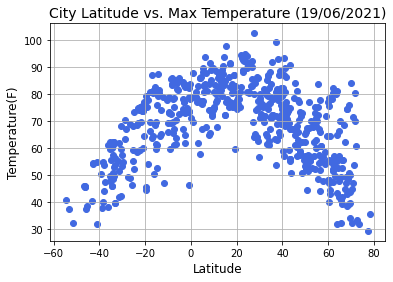

In [7]:
plt.scatter(lat, temp, marker="o", facecolors="royalblue")

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Max Temperature (19/06/2021)", fontsize=14)
plt.ylabel("Temperature(F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Save and show scatter plot
plt.savefig("../Images/latitude-vs-temp.png")
plt.show()


### Analysis
Scatterplot (above) for Temperature (F) vs. Latitude shows temperatures North and South of the Equator have lower max temperatures as compared to temperature closer to the Equator. 

## Latitude vs. Humidity Plot

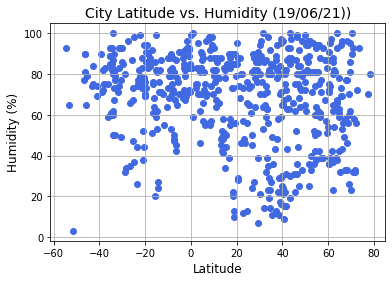

In [8]:
plt.scatter(lat, humidity, marker="o", facecolors="royalblue")

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Humidity (19/06/21))", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-humidity.png")
plt.show()

### Analysis 
There seems to be no correlation between City Latitude and Humidity levels for randomly selected cities.

## Latitude vs. Cloudiness Plot

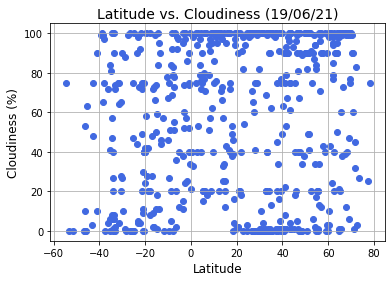

In [9]:
plt.scatter(lat, cloudiness, marker="o", facecolors="royalblue")

# --- add labels, title, limits & grid ---
plt.title("Latitude vs. Cloudiness (19/06/21)", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-cloudiness.png")
plt.show()


### Analysis
There seems to be no correlation between Latitude and Cloudiness 

## Latitude vs. Wind Speed Plot

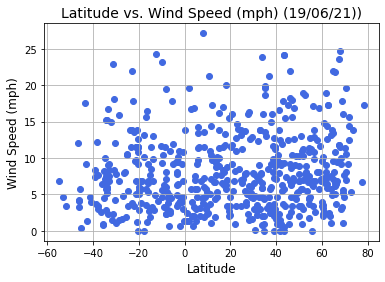

In [10]:
plt.scatter(lat, windSpeed, marker="o", facecolors="royalblue")

# --- add labels, title, limits & grid ---
plt.title("Latitude vs. Wind Speed (mph) (19/06/21))", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-cloudiness.png")
plt.show()

### Analysis
No correlation between Latitude and cloudiness. However wind speed during this time of the year is low.

## Linear Regression

In [11]:
# Create a function to create Linear Regression plots

def linearRegression(x_values,y_values,eq_plotX,eq_plotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(eq_plotX,eq_plotY),fontsize=15,color="red")
    
    # X always Latitude
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()
    
# Create and split dataframe
northern_df = city_weather_df.loc[city_weather_df["Lat"] > 0]
southern_df = city_weather_df.loc[city_weather_df["Lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is -0.6726510651990277
y = -0.49x + 89.0


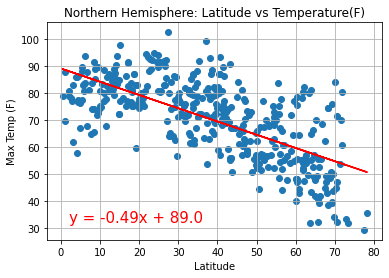

In [12]:
#Create data sets to compare 
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]

#Display's the equation at x,y points
eq_plotX = 2
eq_plotY = 32

#label y axis
y_label = "Max Temp (F)"

#Title
plt.title(f'Northern Hemisphere: Latitude vs Temperature(F)')

#Display the Regression Value
linearRegression(x_values,y_values,eq_plotX,eq_plotY,y_label)

#Out an image file
plt.savefig(f'../output/Northern Hemisphere Latitude vs Temp.png')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is 0.7360757424586789
y = 0.76x + 80.53


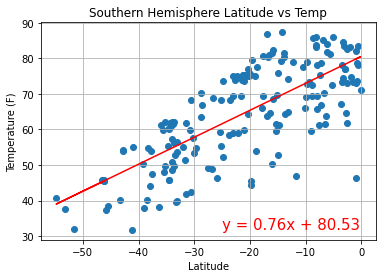

In [13]:
#Get Latitude and Max temp values
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]

#Display's the equation at x,y points
eq_plotX = -25
eq_plotY = 32

#Display
y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere Latitude vs Temp')
linearRegression(x_values,y_values,eq_plotX,eq_plotY,y_label)
plt.savefig(f'../output/Southern Hemisphere Latitude vs Temp.png')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is -0.07099567213454511
y = -0.09x + 68.49


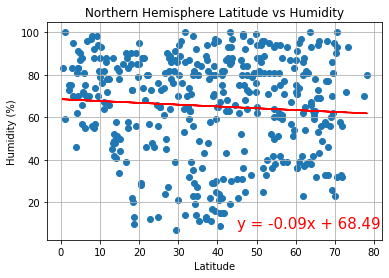

In [14]:
#Get Latitude and Humidity values
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]

#Display's the equation at x,y points
eq_plotX = 45
eq_plotY = 8

#Display
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs Humidity')
linearRegression(x_values,y_values,eq_plotX,eq_plotY,y_label)
plt.savefig(f'../output/Northern Hemisphere Latitude vs Humidity.png')
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.038930606367334496
y = 0.05x + 74.99


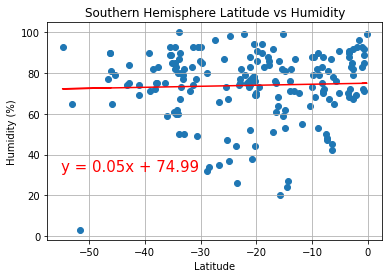

In [15]:
#Get Latitude and Humidity values
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]

#Display's the equation at x,y points
eq_plotX = -55
eq_plotY = 32

#Display
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere Latitude vs Humidity')
linearRegression(x_values,y_values,eq_plotX,eq_plotY,y_label)
plt.savefig(f'../output/Southern Hemisphere Latitude vs Humidity.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.003227685629202611
y = 0.01x + 59.46


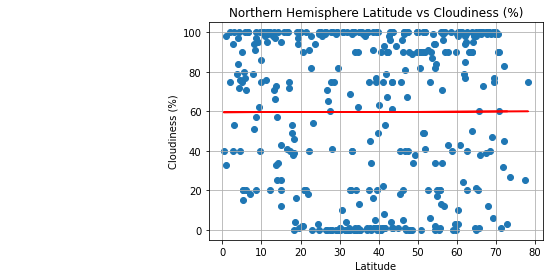

In [16]:
#Get Latitude and Cloudiness values
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]

#Display's the equation at x,y points
eq_plotX = -55
eq_plotY = 12

#Display
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness (%)')
linearRegression(x_values,y_values,eq_plotX,eq_plotY,y_label)
plt.savefig(f'../output/Nothern Hemisphere Latitude vs Cloudiness.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.19287818910213111
y = 0.52x + 59.04


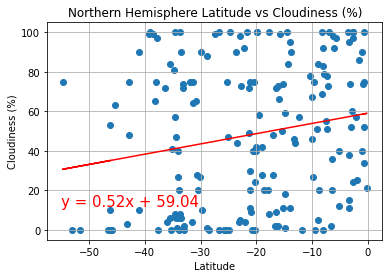

In [17]:
#Get Latitude and Cloudiness values
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]

#Display's the equation at x,y points
eq_plotX = -55
eq_plotY = 12

#Display
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness (%)')
linearRegression(x_values,y_values,eq_plotX,eq_plotY,y_label)
plt.savefig(f'../output/Nothern Hemisphere Latitude vs Cloudiness.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [18]:
#Get Latitude and Windspeed values
x_values = northern_df["Lat"]
y_values = northern_df["Wind speed"]

#Display's the equation at x,y points
eq_plotX = 2
eq_plotY = 31

#Display
y_label = "Wind Speed (mph)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed (mph)')
linearRegression(x_values,y_values,eq_plotX,eq_plotY,y_label)
plt.savefig(f'../output/Northern Hemisphere Latitude vs Wind Speed.png')
plt.show()

KeyError: 'Wind speed'

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is -0.03822587034337133
y = -0.01x + 6.45


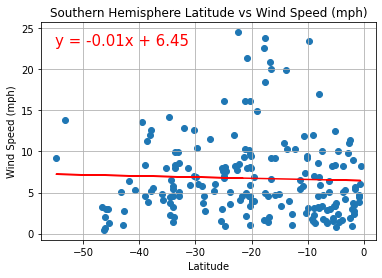

In [145]:
#Get Latitude and Windspeed values
x_values = southern_df["Lat"]
y_values = southern_df["Wind speed"]

#Display's the equation at x,y points
eq_plotX = -55
eq_plotY = 23

#Display
y_label = "Wind Speed (mph)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed (mph)')
linearRegression(x_values,y_values,eq_plotX,eq_plotY,y_label)
plt.savefig(f'../output/Southern Hemisphere Latitude vs Wind Speed.png')
plt.show()